In [48]:
# part 1
import sklearn
import pandas as pd

In [4]:
data = pd.read_csv("./data/project1.csv")

In [5]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,23.337949,5.484615,194.724359,2978.676923,15.543846,75.887179,1.576923
std,7.759300,1.705433,104.910938,852.709438,2.723468,3.633264,0.803579
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,101.750000,2220.750000,13.825000,73.000000,1.000000
50%,22.350000,4.000000,151.000000,2831.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,293.250000,3618.250000,17.000000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 0 to 389
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           384 non-null    Float64
 1   cylinders     384 non-null    Int64  
 2   displacement  384 non-null    Float64
 3   horsepower    384 non-null    float64
 4   weight        384 non-null    Int64  
 5   acceleration  384 non-null    Float64
 6   model_year    384 non-null    Int64  
 7   origin        384 non-null    Int64  
 8   car_name      384 non-null    string 
dtypes: Float64(3), Int64(4), float64(1), string(1)
memory usage: 32.6 KB


In [7]:
data = data.convert_dtypes()

In [45]:
data.shape

(390, 9)

In [46]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [34]:
# Convert non-numeric values to NaN in the horsepower column <- chatgpt helps
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

# Drop rows with NaN values in the horsepower column <- chatgpt helps
data.dropna(subset=['horsepower'], inplace=True)

# Convert horsepower column to float
data['horsepower'] = data['horsepower'].astype(float)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 0 to 389
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           384 non-null    Float64
 1   cylinders     384 non-null    Int64  
 2   displacement  384 non-null    Float64
 3   horsepower    384 non-null    float64
 4   weight        384 non-null    Int64  
 5   acceleration  384 non-null    Float64
 6   model_year    384 non-null    Int64  
 7   origin        384 non-null    Int64  
 8   car_name      384 non-null    string 
dtypes: Float64(3), Int64(4), float64(1), string(1)
memory usage: 32.6 KB


In [41]:
data.isnull().values.any()

False

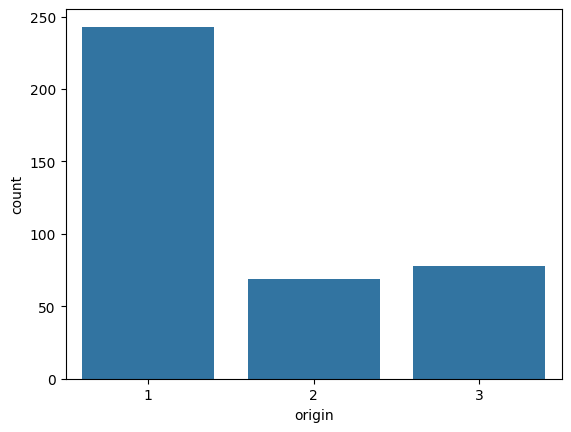

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=data,x='origin')
plt.show()

In [70]:
# Drop the 'car_name' column before calculating the correlation matrix <- chatgpt helps on dropping the string variable column
corrData = data.drop(columns=['car_name'])

correlation_matrix = corrData.corr()
correlation_matrix
# according to this table, Cylinders, Displacement, Horsepower, and Weight are strong negative correlations with fuel efficiency (mpg) as their correlation values are close to 1 or -1 than the other variables.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777401,-0.807074,-0.778738,-0.835072,0.421554,0.568521,0.581414
cylinders,-0.777401,1.000000,0.951135,0.842812,0.898874,-0.512394,-0.327959,-0.582805
displacement,-0.807074,0.951135,1.000000,0.896699,0.933251,-0.549512,-0.360556,-0.625391
horsepower,-0.778738,0.842812,0.896699,1.000000,0.864194,-0.695653,-0.409569,-0.464238
weight,-0.835072,0.898874,0.933251,0.864194,1.000000,-0.422260,-0.302209,-0.593544
acceleration,0.421554,-0.512394,-0.549512,-0.695653,-0.422260,1.000000,0.290000,0.219353
model_year,0.568521,-0.327959,-0.360556,-0.409569,-0.302209,0.290000,1.000000,0.197245
origin,0.581414,-0.582805,-0.625391,-0.464238,-0.593544,0.219353,0.197245,1.000000


In [60]:
# part 2
from sklearn.model_selection import train_test_split
X = corrData.drop('origin',axis=1)
y = corrData['origin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=1)

In [61]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="perceptron", alpha=0.01)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='perceptron')

In [74]:
from sklearn.metrics import accuracy_score
accuracy_train = clf.score(X_train, y_train)
print('Accuracy on train data is : {:.2}'.format(accuracy_train))
accuracy_test = clf.score(X_test, y_test)
print('Accuracy on test data is : {:.2}'.format(accuracy_test))
print("Cylinders, Displacement, Horsepower, and Weight: These measures are important as they directly relate to the engine's power and size, which can vary significantly based on the vehicle's origin. Different regions might have distinct preferences for engine types and sizes, affecting the origin prediction.\nModel Year: This measure provides information about the vehicle's age and technological advancements incorporated into newer models. Newer models tend to have different engineering standards and may reflect improvements in fuel efficiency, safety, and performance.")

Accuracy on train data is : 0.7
Accuracy on test data is : 0.69
Cylinders, Displacement, Horsepower, and Weight: These measures are important as they directly relate to the engine's power and size, which can vary significantly based on the vehicle's origin. Different regions might have distinct preferences for engine types and sizes, affecting the origin prediction.
Model Year: This measure provides information about the vehicle's age and technological advancements incorporated into newer models. Newer models tend to have different engineering standards and may reflect improvements in fuel efficiency, safety, and performance.


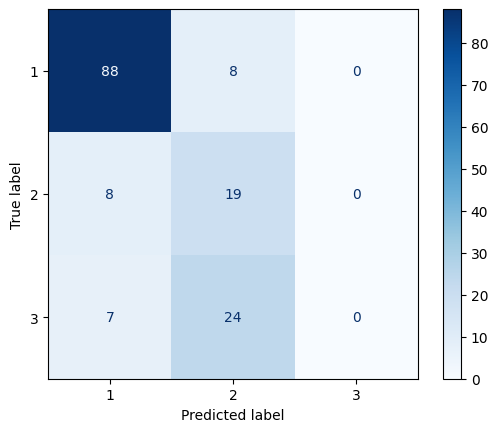

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)